In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge

In [2]:
ds_FlatPrices = pd.read_csv('train.csv')

In [3]:
ds_FlatPrices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


In [4]:
ds_FlatPrices.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [5]:
ds_FlatPrices.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [6]:
feature_names = ds_FlatPrices.axes[1].values
numeric_features = np.delete(feature_names, [0, 1, 9, 10, 11, 13, 15, 18])

In [7]:
ds_FlatPrices['HouseYear'].unique()[ds_FlatPrices['HouseYear'].unique().argsort()]

array([    1910,     1912,     1914,     1916,     1917,     1918,
           1919,     1928,     1929,     1930,     1931,     1932,
           1933,     1934,     1935,     1936,     1937,     1938,
           1939,     1940,     1941,     1942,     1947,     1948,
           1950,     1951,     1952,     1953,     1954,     1955,
           1956,     1957,     1958,     1959,     1960,     1961,
           1962,     1963,     1964,     1965,     1966,     1967,
           1968,     1969,     1970,     1971,     1972,     1973,
           1974,     1975,     1976,     1977,     1978,     1979,
           1980,     1981,     1982,     1983,     1984,     1985,
           1986,     1987,     1988,     1989,     1990,     1991,
           1992,     1993,     1994,     1995,     1996,     1997,
           1998,     1999,     2000,     2001,     2002,     2003,
           2004,     2005,     2006,     2007,     2008,     2009,
           2010,     2011,     2012,     2013,     2014,     2

In [8]:
ds_FlatPrices['Rooms'].unique()

array([ 2.,  3.,  1.,  4., 10.,  0.,  5., 19.,  6.])

In [9]:
ds_FlatPrices.loc[ds_FlatPrices['HouseYear'] == 4968, 'HouseYear'] = 1968
ds_FlatPrices.loc[ds_FlatPrices['HouseYear'] == 20052011, 'HouseYear'] = 2008

In [10]:
ds_FlatPrices.loc[ds_FlatPrices['Rooms'] > 6]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
377,5927,57,10.0,59.056975,36.223072,10.0,22,22.0,2002,0.090799,B,B,74,19083,2,NaN,5,15,B,317265.323792
1454,8491,1,19.0,42.006046,21.779288,7.0,17,17.0,2014,0.007122,B,B,1,264,0,NaN,0,1,B,78364.616704
8849,14865,9,10.0,60.871266,38.420681,10.0,3,2.0,1994,0.161532,B,B,25,5648,1,30.0,2,4,B,172329.270863


In [11]:
ds_FlatPrices.loc[ds_FlatPrices['Rooms'] > 6, 'Rooms'] = ds_FlatPrices.loc[ds_FlatPrices['Rooms'] > 6, 
                                                                           'LifeSquare'] // 15

In [12]:
ds_FlatPrices.loc[ds_FlatPrices['LifeSquare'] > 150]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
590,14990,23,2.0,48.449873,263.542020,5.0,6,5.0,1972,0.075779,B,B,6,1437,3,NaN,0,2,B,141780.231857
1641,11055,151,1.0,174.649522,174.837082,15.0,10,12.0,1958,0.236108,B,B,16,3893,27,NaN,3,10,B,232766.187698
1981,7917,27,0.0,212.932361,211.231125,0.0,2,3.0,2008,0.211401,B,B,9,1892,0,NaN,0,1,B,302211.260887
1982,5548,86,5.0,275.645284,233.949309,26.0,12,37.0,2011,0.161976,B,A,31,7010,5,4508.0,3,7,B,455264.882666
2603,5621,23,3.0,163.495333,161.504222,12.0,5,3.0,1977,0.014073,B,B,2,475,0,NaN,0,0,B,207007.956663
3651,5300,30,3.0,169.509941,170.713651,1.0,2,2.0,2018,0.000078,B,B,22,6398,141,1046.0,3,23,B,200800.673767
4047,15362,23,1.0,163.286965,161.155275,1.0,4,3.0,1977,0.014073,B,B,2,475,0,NaN,0,0,B,228572.520347
4328,16550,27,3.0,81.694417,7480.592129,1.0,9,17.0,2016,0.017647,B,B,2,469,0,NaN,0,0,B,217357.492366
4690,2307,102,1.0,409.425181,410.639749,10.0,4,4.0,2016,0.238617,B,B,26,3889,6,705.0,3,6,B,90470.430830
5444,14181,62,3.0,156.636577,153.685835,1.0,1,3.0,2005,0.072158,B,B,2,629,1,NaN,0,0,A,502523.573863


In [13]:
FlatPrices_corr = ds_FlatPrices.corr()

for item in numeric_features:
    high_corr = FlatPrices_corr.loc[abs(FlatPrices_corr[item]) > 0.7].drop(item, axis=0).index
    if list(high_corr):
        print(item, list(high_corr))

Social_1 ['Social_2']


In [14]:
ds_FlatPrices[['Social_1', 'Social_2']].corr()

,Social_1,Social_2
Social_1,1.000000,0.955988
Social_2,0.955988,1.000000


Корреляция между индексами близка к линейной. Будем учитывать только один из них.

In [15]:
ds_FlatPrices = ds_FlatPrices.drop(['Social_2'], axis=1)

In [16]:
np.shape(ds_FlatPrices.loc[ds_FlatPrices['Ecology_2'] != ds_FlatPrices['Ecology_3']])

(372, 19)

Всего 372 измерения, где индексы экологии 2 и 3 не равны друг другу. Удалим один из них

In [17]:
ds_FlatPrices = ds_FlatPrices.drop(['Ecology_3'], axis=1)

Healthcare_1 имеет слишком мало измерений (50% от общей выборки) - так же не будем его учитывать

In [18]:
ds_FlatPrices = ds_FlatPrices.drop(['Healthcare_1'], axis=1)

In [19]:
ds_FlatPrices.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Social_1,Social_3,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,33,5,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,46,1,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,34,0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,23,3,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,35,1,2,4,B,150226.531644


In [20]:
ds_FlatPrices['KitchenSquare'].unique()[ds_FlatPrices['KitchenSquare'].unique().argsort()]

array([0.000e+00, 1.000e+00, 2.000e+00, 3.000e+00, 4.000e+00, 5.000e+00,
       6.000e+00, 7.000e+00, 8.000e+00, 9.000e+00, 1.000e+01, 1.100e+01,
       1.200e+01, 1.300e+01, 1.400e+01, 1.500e+01, 1.600e+01, 1.700e+01,
       1.800e+01, 1.900e+01, 2.000e+01, 2.100e+01, 2.200e+01, 2.300e+01,
       2.500e+01, 2.600e+01, 2.700e+01, 2.900e+01, 3.000e+01, 3.100e+01,
       3.200e+01, 3.500e+01, 3.600e+01, 3.700e+01, 3.900e+01, 4.000e+01,
       4.100e+01, 4.200e+01, 4.300e+01, 4.800e+01, 5.100e+01, 5.300e+01,
       5.400e+01, 5.800e+01, 6.000e+01, 6.200e+01, 6.300e+01, 6.600e+01,
       7.200e+01, 7.300e+01, 7.500e+01, 7.800e+01, 8.400e+01, 9.600e+01,
       1.120e+02, 1.230e+02, 1.970e+03, 2.014e+03])

In [21]:
Kitchen_percent = (
    ds_FlatPrices.loc[(ds_FlatPrices['KitchenSquare'] < 25) & (ds_FlatPrices['KitchenSquare'] > 0), 'KitchenSquare'] / 
    ds_FlatPrices.loc[(ds_FlatPrices['KitchenSquare'] < 25) & (ds_FlatPrices['KitchenSquare'] > 0), 'Square']).mean()

In [22]:
Kitchen_percent

0.1183971280161947

есть строки, где площадь кухни почти равна площади квартиры. Установим для таких данных значение площади кухни равное среднему значению в процентах площади кухни от общей площади по всей выборке. То же самое сделаем для данных с площадью кухни равной 0

In [23]:
ds_FlatPrices.loc[(ds_FlatPrices['KitchenSquare'] > 25) & 
                  (ds_FlatPrices['KitchenSquare'] - ds_FlatPrices['Square'] < 5), 
                  'KitchenSquare']  = ds_FlatPrices.loc[(ds_FlatPrices['KitchenSquare'] > 25) & 
                                      (ds_FlatPrices['KitchenSquare'] - ds_FlatPrices['Square'] < 5), 
                                      'Square'] * Kitchen_percent

ds_FlatPrices.loc[(ds_FlatPrices['KitchenSquare'] == 0), 'KitchenSquare'] = ds_FlatPrices.loc[
    (ds_FlatPrices['KitchenSquare'] == 0), 'Square'] * Kitchen_percent

In [24]:
ds_FlatPrices.loc[(ds_FlatPrices['KitchenSquare'] > 25)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Social_1,Social_3,Helthcare_2,Shops_1,Shops_2,Price
1064,14656,62,1.0,47.100719,46.447960,2014.00000,4,1.0,2014,0.072158,B,2,1,0,0,A,108337.484207
1981,7917,27,0.0,212.932361,211.231125,25.21058,2,3.0,2008,0.211401,B,9,0,0,1,B,302211.260887
1982,5548,86,5.0,275.645284,233.949309,32.63561,12,37.0,2011,0.161976,B,31,5,3,7,B,455264.882666
5149,13703,42,1.0,38.071692,19.723548,73.00000,9,10.0,2006,0.158249,B,21,0,1,0,B,160488.033165
7088,6569,27,1.0,38.220258,18.716856,84.00000,4,17.0,2018,0.011654,B,4,0,0,0,B,99079.960518
8584,14679,81,1.0,32.276663,19.278394,1970.00000,6,1.0,1977,0.006076,B,30,0,6,6,B,105539.556275


In [25]:
ds_FlatPrices.loc[(ds_FlatPrices['KitchenSquare'] > 100), 'KitchenSquare'] = ds_FlatPrices.loc[
    (ds_FlatPrices['KitchenSquare'] > 100), 'KitchenSquare'] / 100

In [26]:
ds_FlatPrices.loc[ds_FlatPrices['Square'] < 10, 'Square'] = ds_FlatPrices.loc[ds_FlatPrices['Square'] < 10, 'Square'] * 10

In [27]:
ds_FlatPrices.loc[ds_FlatPrices['Square'] < 18, 'Square'] = 18

In [28]:
ds_FlatPrices.loc[ds_FlatPrices['Square'] < ds_FlatPrices['LifeSquare'], 'Square'] = ds_FlatPrices.loc[
    ds_FlatPrices['Square'] < ds_FlatPrices['LifeSquare'], 'LifeSquare']

In [29]:
ds_FlatPrices['LifeSquare'] = ds_FlatPrices['LifeSquare'].fillna(ds_FlatPrices['Square'] - ds_FlatPrices['KitchenSquare'])

In [30]:
Lifesquare_percent = (ds_FlatPrices.loc[ds_FlatPrices['LifeSquare'] > 10, 'LifeSquare'] / ds_FlatPrices.loc[
    ds_FlatPrices['LifeSquare'] > 10, 'Square']).mean()
Lifesquare_percent

0.7223904948551757

In [31]:
ds_FlatPrices.loc[ds_FlatPrices['LifeSquare'] < 10, 'LifeSquare'] = ds_FlatPrices.loc[
    ds_FlatPrices['LifeSquare'] < 10, 'Square'] * Lifesquare_percent

In [32]:
ds_FlatPrices.loc[(ds_FlatPrices['KitchenSquare'] < 1), 'KitchenSquare'] = ds_FlatPrices.loc[(ds_FlatPrices['KitchenSquare'] < 1), 'KitchenSquare'] * 10

In [33]:
ds_FlatPrices.loc[(ds_FlatPrices['Rooms'] == 0) & (ds_FlatPrices['Square'] < 100), 'Rooms'] = ds_FlatPrices.loc[
    (ds_FlatPrices['Rooms'] == 0) & (ds_FlatPrices['Square'] < 100), 'LifeSquare'] // 15

In [34]:
ds_FlatPrices.loc[ds_FlatPrices['Rooms'] == 0, 'Rooms'] = ds_FlatPrices['Rooms'].max()

In [35]:
indexes = ds_FlatPrices.loc[ds_FlatPrices['Floor'] > ds_FlatPrices['HouseFloor']].index

In [36]:
(ds_FlatPrices.loc[indexes, 'HouseFloor'], ds_FlatPrices.loc[indexes, 'Floor']) = (ds_FlatPrices.loc[indexes, 'Floor'], ds_FlatPrices.loc[indexes, 'HouseFloor'])

In [37]:
ds_FlatPrices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       10000 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null float64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Social_1         10000 non-null int64
Social_3         10000 non-null int64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(7), object(2)
memory usage: 1.3+ MB


In [38]:
ds_FlatPrices = pd.get_dummies(ds_FlatPrices)

In [39]:
ds_FlatPrices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       10000 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null float64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Social_1         10000 non-null int64
Social_3         10000 non-null int64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Price            10000 non-null float64
Ecology_2_A      10000 non-null uint8
Ecology_2_B      10000 non-null uint8
Shops_2_A        10000 non-null uint8
Shops_2_B        10000 non-null uint8
dtypes: float64(8), int64(7), uint8(4)
memory usage: 1.2 MB


In [40]:
feature_names = ds_FlatPrices.axes[1].values
feature_names = np.delete(feature_names, 13)
feature_names

array(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare',
       'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1',
       'Social_1', 'Social_3', 'Helthcare_2', 'Price', 'Ecology_2_A',
       'Ecology_2_B', 'Shops_2_A', 'Shops_2_B'], dtype=object)

In [41]:
data_stat1 = ds_FlatPrices.groupby(
    ['Helthcare_2', 'Rooms'], as_index=False)[['Price']].mean().rename(columns={'Price':'mean_price_by_Healthcare'}
                                                                      )
ds_FlatPrices = pd.merge(ds_FlatPrices, data_stat1, on=['Helthcare_2', 'Rooms'], how='left')

In [42]:
data_stat2 = ds_FlatPrices.groupby(
    ['DistrictId', 'Rooms'],as_index=False)[['Price']].mean().rename(columns={'Price':'mean_price_in_District'}
                                                                    )
ds_FlatPrices = pd.merge(ds_FlatPrices, data_stat2, on=['DistrictId', 'Rooms'], how='left')

In [43]:
data_stat3 = ds_FlatPrices.groupby(
    ['HouseYear', 'Rooms'], as_index=False)[['Price']].mean().rename(columns={'Price':'mean_price_by_HouseYear'}
                                                                      )
ds_FlatPrices = pd.merge(ds_FlatPrices, data_stat3, on=['HouseYear', 'Rooms'], how='left')


In [44]:
data_stat4 = ds_FlatPrices.groupby(
    ['Social_1', 'Rooms'], as_index=False)[['Price']].mean().rename(columns={'Price':'mean_price_by_Social_1'}
                                                                      )
ds_FlatPrices = pd.merge(ds_FlatPrices, data_stat4, on=['Social_1', 'Rooms'], how='left')

In [45]:
data_stat5 = ds_FlatPrices.groupby(
    ['Shops_1', 'Rooms'], as_index=False)[['Price']].mean().rename(columns={'Price':'mean_price_by_Shops_1'}
                                                                      )
ds_FlatPrices = pd.merge(ds_FlatPrices, data_stat5, on=['Shops_1', 'Rooms'], how='left')

In [46]:
data_stat6 = ds_FlatPrices.groupby(
    ['Social_3', 'Rooms'], as_index=False)[['Price']].mean().rename(columns={'Price':'mean_price_by_Social_3'}
                                                                      )
ds_FlatPrices = pd.merge(ds_FlatPrices, data_stat6, on=['Social_3', 'Rooms'], how='left')

In [47]:
data_stat7 = ds_FlatPrices.groupby(
    ['KitchenSquare'], as_index=False)[['Price']].mean().rename(columns={'Price':'mean_price_by_KitchenSquare'}
                                                                 )

ds_FlatPrices = pd.merge(ds_FlatPrices, data_stat7, on=['KitchenSquare'], how='left')

In [48]:
data_stat8 = ds_FlatPrices.groupby(
    ['HouseFloor', 'Rooms'], as_index=False)[['Price']].mean().rename(columns={'Price':'mean_price_by_HouseFloor'}
                                                                      )
ds_FlatPrices = pd.merge(ds_FlatPrices, data_stat8, on=['HouseFloor', 'Rooms'], how='left')

In [49]:
data_stat9 = ds_FlatPrices.groupby(
    ['Floor', 'Rooms'], as_index=False)[['Price']].mean().rename(columns={'Price':'mean_price_by_Floor'}
                                                                      )
ds_FlatPrices = pd.merge(ds_FlatPrices, data_stat9, on=['Floor', 'Rooms'], how='left')

In [50]:
data_stat10 = ds_FlatPrices.groupby(
    ['Ecology_1', 'Rooms'], as_index=False)[['Price']].mean().rename(columns={'Price':'mean_price_by_Ecology_1'}
                                                                      )
ds_FlatPrices = pd.merge(ds_FlatPrices, data_stat10, on=['Ecology_1', 'Rooms'], how='left')

### Обучение

In [51]:
scaler = StandardScaler()

In [52]:
X = ds_FlatPrices.drop(['Price'], axis=1)
y = ds_FlatPrices['Price']

In [53]:
X.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,mean_price_by_Healthcare,mean_price_in_District,mean_price_by_HouseYear,mean_price_by_Social_1,mean_price_by_Shops_1,mean_price_by_Social_3,mean_price_by_KitchenSquare,mean_price_by_HouseFloor,mean_price_by_Floor,mean_price_by_Ecology_1
0,14038,35,2.0,47.981561,29.442751,6.000000,7.0,9.0,1969,0.089040,...,189626.495651,213160.076297,195878.930206,235360.507917,260586.908528,246551.622504,200426.114389,204549.996070,224153.227228,225738.572494
1,15053,41,3.0,65.683640,40.049543,8.000000,7.0,9.0,1978,0.000070,...,309652.354527,303643.563728,274005.901466,341075.353225,262027.379532,248905.151802,227798.018922,260104.363600,297386.608019,262027.379532
2,4765,53,2.0,44.947953,29.197612,5.321709,8.0,12.0,1968,0.049637,...,234500.885439,259938.729121,201183.190845,226245.804543,239820.365654,188866.796276,220925.908524,211603.979811,221204.669229,265281.616079
3,5809,58,2.0,53.352981,52.731512,9.000000,8.0,17.0,1977,0.437885,...,189626.495651,172368.882269,188866.276907,262547.663451,223312.563007,203574.043662,234223.299374,206690.746561,221204.669229,178881.262186
4,10783,99,1.0,39.649192,23.776169,7.000000,11.0,12.0,1976,0.012339,...,172186.875144,155748.415754,170534.786934,176727.732624,161260.104197,150430.335182,224859.244600,166185.179438,157551.249040,158162.006042


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [55]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)

X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

In [56]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

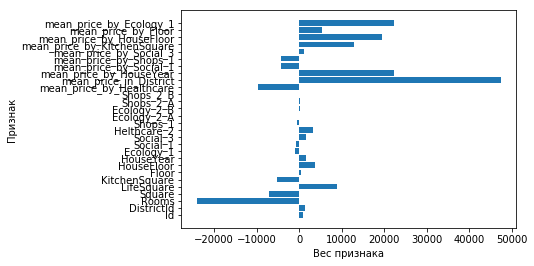

In [57]:
plt.barh(X.columns, lr.coef_.flatten())

plt.xlabel("Вес признака")
plt.ylabel("Признак")

plt.show()

In [58]:
important_features = [
    feature
    for feature, weight in zip(X.columns, lr.coef_.flatten())
    if np.abs(weight) > 1000
]
print(important_features)

['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'HouseFloor', 'HouseYear', 'Social_3', 'Helthcare_2', 'mean_price_by_Healthcare', 'mean_price_in_District', 'mean_price_by_HouseYear', 'mean_price_by_Social_1', 'mean_price_by_Shops_1', 'mean_price_by_Social_3', 'mean_price_by_KitchenSquare', 'mean_price_by_HouseFloor', 'mean_price_by_Floor', 'mean_price_by_Ecology_1']


In [59]:
lr.fit(
    X_train_scaled.loc[:, important_features],
    y_train
)

y_pred = lr.predict(X_test_scaled.loc[:, important_features])

r2_score_1 = r2_score(y_test, y_pred)
r2_score_1

0.7149885843852265

## Подготовка тестового датасета

In [60]:
ds_FlatPrices_test = pd.read_csv('test.csv')

In [61]:
ds_FlatPrices_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       3959 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null object
Ecology_3        5000 non-null object
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Healthcare_1     2623 non-null float64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Shops_2          5000 non-null object
dtypes: float64(7), int64(9), object(3)
memory usage: 742.3+ KB


In [62]:
ds_FlatPrices_test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A


In [63]:
def prepare_test_dataset(ds_FlatPrices, Kitchen_percent, Lifesquare_percent, data_stat1, data_stat2, 
                         data_stat3, data_stat4, data_stat5, data_stat6, data_stat7, data_stat8, data_stat9, data_stat10):
    ds_FlatPrices = ds_FlatPrices.drop(['Ecology_3'], axis=1)
    ds_FlatPrices = ds_FlatPrices.drop(['Social_2'], axis=1)
    ds_FlatPrices = ds_FlatPrices.drop('Healthcare_1', axis=1)
    ds_FlatPrices.loc[ds_FlatPrices['Rooms'] > 6, 'Rooms'] = ds_FlatPrices.loc[ds_FlatPrices['Rooms'] > 6, 
                                                                           'LifeSquare'] // 15
    
    ds_FlatPrices.loc[(ds_FlatPrices['KitchenSquare'] > 25) & 
                  (ds_FlatPrices['KitchenSquare'] - ds_FlatPrices['Square'] < 5), 
                  'KitchenSquare']  = ds_FlatPrices.loc[(ds_FlatPrices['KitchenSquare'] > 25) & 
                                      (ds_FlatPrices['KitchenSquare'] - ds_FlatPrices['Square'] < 5), 
                                      'Square'] * Kitchen_percent
    
    ds_FlatPrices.loc[(ds_FlatPrices['KitchenSquare'] == 0), 'KitchenSquare'] = ds_FlatPrices.loc[
        (ds_FlatPrices['KitchenSquare'] == 0), 'Square'] * Kitchen_percent
    
    ds_FlatPrices.loc[(ds_FlatPrices['KitchenSquare'] > 100), 'KitchenSquare'] = ds_FlatPrices.loc[
        (ds_FlatPrices['KitchenSquare'] > 100), 'KitchenSquare'] / 100
    
    ds_FlatPrices.loc[ds_FlatPrices['Square'] < 10, 'Square'] = ds_FlatPrices.loc[
        ds_FlatPrices['Square'] < 10, 'Square'] * 10
    
    ds_FlatPrices.loc[ds_FlatPrices['Square'] < 18, 'Square'] = 18
    
    ds_FlatPrices.loc[ds_FlatPrices['Square'] < ds_FlatPrices['LifeSquare'], 'Square'] = ds_FlatPrices.loc[
        ds_FlatPrices['Square'] < ds_FlatPrices['LifeSquare'], 'LifeSquare']
    
    ds_FlatPrices['LifeSquare'] = ds_FlatPrices['LifeSquare'].fillna(
        ds_FlatPrices['Square'] - ds_FlatPrices['KitchenSquare'])
    
    ds_FlatPrices.loc[ds_FlatPrices['LifeSquare'] < 10, 'LifeSquare'] = ds_FlatPrices.loc[
        ds_FlatPrices['LifeSquare'] < 10, 'Square'] * Lifesquare_percent
    
    ds_FlatPrices.loc[(ds_FlatPrices['KitchenSquare'] < 1), 'KitchenSquare'] = ds_FlatPrices.loc[
        (ds_FlatPrices['KitchenSquare'] < 1), 'KitchenSquare'] * 10
    
    ds_FlatPrices.loc[(ds_FlatPrices['Rooms'] == 0) & (ds_FlatPrices['Square'] < 100), 'Rooms'] = ds_FlatPrices.loc[
        (ds_FlatPrices['Rooms'] == 0) & (ds_FlatPrices['Square'] < 100), 'LifeSquare'] // 15
    
    ds_FlatPrices.loc[ds_FlatPrices['Rooms'] == 0, 'Rooms'] = ds_FlatPrices['Rooms'].max()
    
    indexes = ds_FlatPrices.loc[ds_FlatPrices['Floor'] > ds_FlatPrices['HouseFloor']].index
    (ds_FlatPrices.loc[indexes, 'HouseFloor'], ds_FlatPrices.loc[indexes, 'Floor']) = (
        ds_FlatPrices.loc[indexes, 'Floor'], ds_FlatPrices.loc[indexes, 'HouseFloor'])
    
    ds_FlatPrices = pd.get_dummies(ds_FlatPrices)
    
    ds_FlatPrices = pd.merge(ds_FlatPrices, data_stat1, on=['Helthcare_2', 'Rooms'], how='left')
    ds_FlatPrices = pd.merge(ds_FlatPrices, data_stat2, on=['DistrictId', 'Rooms'], how='left')
    ds_FlatPrices = pd.merge(ds_FlatPrices, data_stat3, on=['HouseYear', 'Rooms'], how='left')
    ds_FlatPrices = pd.merge(ds_FlatPrices, data_stat4, on=['Social_1', 'Rooms'], how='left')
    ds_FlatPrices = pd.merge(ds_FlatPrices, data_stat5, on=['Shops_1', 'Rooms'], how='left')
    ds_FlatPrices = pd.merge(ds_FlatPrices, data_stat6, on=['Social_3', 'Rooms'], how='left')
    ds_FlatPrices = pd.merge(ds_FlatPrices, data_stat7, on=['KitchenSquare'], how='left')
    ds_FlatPrices = pd.merge(ds_FlatPrices, data_stat8, on=['HouseFloor', 'Rooms'], how='left')
    ds_FlatPrices = pd.merge(ds_FlatPrices, data_stat9, on=['Floor', 'Rooms'], how='left')
    ds_FlatPrices = pd.merge(ds_FlatPrices, data_stat10, on=['Ecology_1', 'Rooms'], how='left')
    
    ds_FlatPrices['mean_price_by_Ecology_1'] = ds_FlatPrices['mean_price_by_Ecology_1'].fillna(
        ds_FlatPrices['mean_price_by_Ecology_1'].mean())
    ds_FlatPrices['mean_price_by_Floor'] = ds_FlatPrices['mean_price_by_Floor'].fillna(
        ds_FlatPrices['mean_price_by_Floor'].mean())
    ds_FlatPrices['mean_price_by_Healthcare'] = ds_FlatPrices['mean_price_by_Healthcare'].fillna(
        ds_FlatPrices['mean_price_by_Healthcare'].mean())
    ds_FlatPrices['mean_price_by_HouseFloor'] = ds_FlatPrices['mean_price_by_HouseFloor'].fillna(
        ds_FlatPrices['mean_price_by_HouseFloor'].mean())
    ds_FlatPrices['mean_price_by_HouseYear'] = ds_FlatPrices['mean_price_by_HouseYear'].fillna(
        ds_FlatPrices['mean_price_by_HouseYear'].mean())
    ds_FlatPrices['mean_price_by_KitchenSquare'] = ds_FlatPrices['mean_price_by_KitchenSquare'].fillna(
        ds_FlatPrices['mean_price_by_KitchenSquare'].mean())
    ds_FlatPrices['mean_price_by_Shops_1'] = ds_FlatPrices['mean_price_by_Shops_1'].fillna(
        ds_FlatPrices['mean_price_by_Shops_1'].mean())
    ds_FlatPrices['mean_price_by_Social_1'] = ds_FlatPrices['mean_price_by_Social_1'].fillna(
        ds_FlatPrices['mean_price_by_Social_1'].mean())
    ds_FlatPrices['mean_price_by_Social_3'] = ds_FlatPrices['mean_price_by_Social_3'].fillna(
        ds_FlatPrices['mean_price_by_Social_3'].mean())
    ds_FlatPrices['mean_price_in_District'] = ds_FlatPrices['mean_price_in_District'].fillna(
        ds_FlatPrices['mean_price_in_District'].mean())
    
    return ds_FlatPrices

In [64]:
ds_FlatPrices_test = prepare_test_dataset(ds_FlatPrices_test, Kitchen_percent, Lifesquare_percent, data_stat1, 
                                          data_stat2, data_stat3, data_stat4, data_stat5, data_stat6, 
                                          data_stat7, data_stat8, data_stat9, data_stat10)

In [65]:
ds_FlatPrices_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 28 columns):
Id                             5000 non-null int64
DistrictId                     5000 non-null int64
Rooms                          5000 non-null float64
Square                         5000 non-null float64
LifeSquare                     5000 non-null float64
KitchenSquare                  5000 non-null float64
Floor                          5000 non-null float64
HouseFloor                     5000 non-null float64
HouseYear                      5000 non-null int64
Ecology_1                      5000 non-null float64
Social_1                       5000 non-null int64
Social_3                       5000 non-null int64
Helthcare_2                    5000 non-null int64
Shops_1                        5000 non-null int64
Ecology_2_A                    5000 non-null uint8
Ecology_2_B                    5000 non-null uint8
Shops_2_A                      5000 non-null uint8
Shops_2_B   

In [66]:
columns_ds = ds_FlatPrices_test.columns

In [67]:
ds_FlatPrices_test_scaled = pd.DataFrame(scaler.transform(ds_FlatPrices_test), columns=columns_ds)

In [68]:
ds_FlatPrices_test_scaled.loc[:,important_features]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,HouseFloor,HouseYear,Social_3,Helthcare_2,mean_price_by_Healthcare,mean_price_in_District,mean_price_by_HouseYear,mean_price_by_Social_1,mean_price_by_Shops_1,mean_price_by_Social_3,mean_price_by_KitchenSquare,mean_price_by_HouseFloor,mean_price_by_Floor,mean_price_by_Ecology_1
0,0.170072,0.138188,-0.083962,-0.099169,-0.065475,0.084934,-0.705635,-0.295144,-0.882358,-0.413361,-0.561164,-0.041605,-0.586146,-0.646646,-0.323882,-0.362848,0.145052,0.088616,-0.541082
1,0.535861,0.138188,0.128576,0.281689,-1.347882,-1.214954,-0.432541,-0.211351,-0.882358,-0.413361,0.291061,-0.391552,-0.367039,0.029751,-0.163236,-0.752916,-0.102788,-0.144314,-0.427301
2,3.187832,-1.092495,-0.433605,-0.290356,1.473412,-1.377440,-4.146616,3.307966,2.477360,-0.421671,-0.002388,-0.005485,-0.568058,-0.715128,0.241086,1.452994,-1.034501,-1.091825,-0.324864
3,-0.081408,0.138188,0.170067,0.103210,0.703968,1.384822,1.206021,-0.211351,1.133473,0.293087,-0.105728,0.690973,0.733684,0.423028,-0.163236,0.515795,0.675139,1.409953,0.161366
4,-0.538644,-1.092495,-0.109794,0.009683,-1.347882,0.572392,1.752209,-0.295144,-0.882358,-1.257003,-1.223498,-0.954245,-1.262552,-1.349034,-0.992231,-0.752916,-1.064840,-1.148089,-1.152821
5,0.055763,-1.092495,-0.184931,-0.030906,-1.347882,1.222336,-0.432541,-0.337040,-0.210414,-0.643828,-0.245989,-1.156611,-0.774842,-0.471924,-1.176750,-0.752916,0.040482,-0.588230,-0.229403
6,-0.630091,0.138188,0.115814,0.244291,-1.347882,0.572392,-0.432541,-0.211351,-0.882358,-0.413361,-1.055360,-0.391552,-0.367039,0.029751,-0.163236,-0.752916,-0.120942,-0.321451,-0.427301
7,-0.424335,0.138188,-0.102482,-0.105458,-0.065475,0.084934,-0.705635,-0.085661,1.133473,0.293087,0.253366,-0.041605,0.639278,0.765519,0.908704,-0.362848,0.145052,-0.113504,0.669024
8,1.038821,1.368871,0.161628,0.037908,0.703968,0.572392,0.659834,-0.169454,-0.210414,1.622648,1.329718,1.666810,1.571005,1.274786,1.698217,0.515795,1.105936,1.812769,1.115939
9,-1.018742,1.368871,0.248727,0.056403,0.703968,0.572392,1.588352,-0.337040,-0.882358,0.578339,-0.002686,0.837114,-0.012596,0.254535,0.483695,0.515795,1.105936,1.311716,0.002010


In [69]:
y_pred = lr.predict(ds_FlatPrices_test_scaled.loc[:, important_features])

In [70]:
ds_FlatPrices_test['Price'] = y_pred

In [71]:
ds_FlatPrices_test.loc[:,['Id','Price']].to_csv('YVlasov_predictions.csv',index=None)